In [36]:
import os
import pandas as pd
import pingouin as pg

nasa_csv = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'results_data', 'NASA_TLX.csv')
print(nasa_csv)
data = pd.read_csv(nasa_csv)
df = pd.melt(data, id_vars=['Participant', 'Modality'], value_vars=['MD', 'PD', 'TD', 'P', 'E', 'F'],
             var_name='Task_Load_Indicator', value_name='Score')

audio_tlx_mean = []
audio_tlx_std = []
audio_data = []
vibro_tlx_mean = []
vibro_tlx_std = []
vibro_data = []
shape_tlx_mean = []
shape_tlx_std = []
shape_data = []

data_scores = []
# Perform Welch's ANOVA across modality for each task load indicator
grouped_modality = df.groupby('Task_Load_Indicator')
for indicator, indicator_data in grouped_modality:
    # print(f'\nTask Load Indicator: {indicator}')

    # data_scores.append(pd.array(indicator_data.groupby('Modality')['Score']))
    # print(data_scores)

    means = indicator_data.groupby('Modality')['Score'].mean()
    stds = indicator_data.groupby('Modality')['Score'].std()
    audio_tlx_mean.append(means[0])
    vibro_tlx_mean.append(means[2])
    shape_tlx_mean.append(means[1])
    audio_tlx_std.append(stds[0])
    vibro_tlx_std.append(stds[2])
    shape_tlx_std.append(stds[1])

print("----AUDIO----")
print(audio_tlx_mean)
print(audio_tlx_std)
print("----VIBRO----")
print(vibro_tlx_mean)
print(vibro_tlx_std)
print("----SHAPE----")
print(shape_tlx_mean)
print(shape_tlx_std)

# # Perform Welch's ANOVA across participants for each task load indicator
# grouped_participant = df.groupby('Task_Load_Indicator')
# for indicator, indicator_data in grouped_participant:
#     print(f'\nTask Load Indicator: {indicator}')
#     #result = pg.welch_anova(data=indicator_data, dv='Score', between='Participant')
#     means = indicator_data.groupby('Participant')['Score'].mean()
#     stds = indicator_data.groupby('Participant')['Score'].std()
#     #p_value = result['p-unc'][0]
#     print(f'Means:')
#     print(means)
#     print(f'Standard Deviations:')
#     print(stds)
#     # print(f'p-value: {p_value}')
#     # print(result)


C:\Users\matil/Desktop\FYP\code_env\eeg-notebooks\FYP\results_data\NASA_TLX.csv
----AUDIO----
[13.6, 12.333333333333334, 13.533333333333333, 11.066666666666666, 5.333333333333333, 11.733333333333333]
[4.205438655564278, 5.367450401216933, 4.485956923980604, 5.417783767591778, 4.623954193215194, 5.637459745395295]
----VIBRO----
[12.533333333333333, 12.466666666666667, 14.0, 10.4, 10.333333333333334, 8.733333333333333]
[4.808722234004531, 5.37011128731009, 4.053217416888888, 4.222389303293981, 6.377042156569664, 4.0964560757992245]
----SHAPE----
[9.928571428571429, 9.142857142857142, 11.071428571428571, 9.785714285714286, 5.214285714285714, 8.642857142857142]
[4.008918628686365, 5.0361331756256575, 3.626065587982607, 4.543441112511215, 3.3091614422009465, 4.27168031894391]


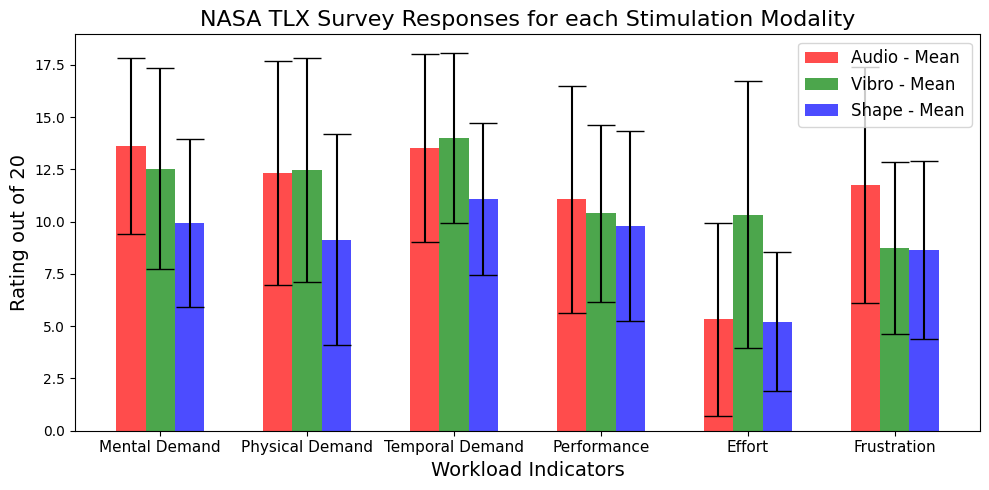

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Define the conditions and types
conditions = ['Audio', 'Vibro', 'Shape']
types = ['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration']

# Define the positions for the bars
x = np.arange(len(types))
bar_width = 0.2

# Create the figure
plt.figure(figsize=(10, 5))

# # Plot data points
# plt.scatter(x - bar_width, audio_data, marker='o', color='red', s=50, label='Audio - Data Points')
# plt.scatter(x, vibro_data, marker='o', color='green', s=50, label='Vibro - Data Points')
# plt.scatter(x + bar_width, shape_data, marker='o', color='blue', s=50, label='Shape - Data Points')

# Plot mean bars with error bars
plt.bar(x - bar_width, audio_tlx_mean, width=bar_width, align='center', label='Audio - Mean', alpha=0.7, color='red', yerr=audio_tlx_std, capsize=10)
plt.bar(x, vibro_tlx_mean, width=bar_width, align='center', label='Vibro - Mean', alpha=0.7, color='green', yerr=vibro_tlx_std, capsize=10)
plt.bar(x + bar_width, shape_tlx_mean, width=bar_width, align='center', label='Shape - Mean', alpha=0.7, color='blue', yerr=shape_tlx_std, capsize=10)

# Customize the plot
plt.xlabel('Workload Indicators', fontsize=14)
plt.ylabel('Rating out of 20', fontsize=14)
plt.title('NASA TLX Survey Responses for each Stimulation Modality', fontsize=16)
plt.xticks(x, types, fontsize=11)
plt.legend(fontsize=12)

plt.savefig('C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\results_data\\svg\\nasa.svg', format='svg')

# Adjust spacing between bars
plt.tight_layout()

# Show the plot
plt.show()


In [46]:
import pandas as pd
import numpy as np
import os

# Load the CSV data into a DataFrame
nasa_csv = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'results_data', 'NASA_TLX.csv')

data = pd.read_csv(nasa_csv)

# Define the indicators
indicators = ['MD', 'PD', 'TD', 'P', 'E', 'F']
types = ['Mental Demand', 'Physical Demand', 'Temporal Demand', 'Performance', 'Effort', 'Frustration']

# Define the modalities
modalities = data['Modality'].unique()

# Create a dictionary to store the data
all_data = {}

# Loop through each indicator
for indicator in indicators:
    # Create a list to store data for the current indicator
    indicator_data = []
    
    # Loop through each modality
    for modality in modalities:
        # Filter the data for the current indicator and modality
        filtered_data = data[(data['Modality'] == modality)][indicator]
        
        # Convert the filtered data to a NumPy array and store it in the list
        indicator_data.append(np.array(filtered_data))
    
    # Convert the list of arrays to a NumPy array and store it in the main dictionary
    all_data[indicator] = np.array(indicator_data)

# Access the data as all_data["Indicator"]
print(all_data['MD'])  # Example: Access MD data for all modalities


[array([13,  7, 18, 17, 11, 13, 16, 18, 18, 12,  9,  7,  8, 21, 15],
       dtype=int64)
 array([19, 12, 15, 15, 21, 13, 12,  6, 14, 12, 13, 17,  7, 17, 17],
       dtype=int64)
 array([11,  9, 15, 16, 11, 11,  9, 15, 10, 12, 17,  7,  7,  5],
       dtype=int64)                                             ]


c:\Users\matil\miniconda3\envs\eeg-notebooks\lib\site-packages\ipykernel_launcher.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [54]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np

labels = ['Audio', 'Vibro', 'Shape']


fig,((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))


# MD
bplot1 = ax1.boxplot(all_data[indicators[0]],
                     vert=True,  # vertical box alignment
                     patch_artist=True)  # will be used to label x-ticks
ax1.set_title(types[0],fontsize=18)
ax1.set_xticklabels(labels, fontsize=14)  # Adjust the fontsize as needed

# PD
bplot2 = ax2.boxplot(all_data[indicators[1]],
                     vert=True,  # vertical box alignment
                     patch_artist=True)  # will be used to label x-ticks
ax2.set_title(types[1],fontsize=18)
ax2.set_xticklabels(labels, fontsize=14)  # Adjust the fontsize as needed

# TD
bplot3 = ax3.boxplot(all_data[indicators[2]],
                     vert=True,  # vertical box alignment
                     patch_artist=True)  # will be used to label x-ticks
ax3.set_title(types[2],fontsize=18)
ax3.set_xticklabels(labels, fontsize=14)  # Adjust the fontsize as needed

# P
bplot4 = ax4.boxplot(all_data[indicators[3]],
                     vert=True,  # vertical box alignment
                     patch_artist=True)  # will be used to label x-ticks
ax4.set_title(types[3],fontsize=18)
ax4.set_xticklabels(labels, fontsize=14)  # Adjust the fontsize as needed

# E
bplot5 = ax5.boxplot(all_data[indicators[4]],
                     vert=True,  # vertical box alignment
                     patch_artist=True)  # will be used to label x-ticks
ax5.set_title(types[4],fontsize=18)
ax5.set_xticklabels(labels, fontsize=14)  # Adjust the fontsize as needed

# F
bplot6 = ax6.boxplot(all_data[indicators[5]],
                     vert=True,  # vertical box alignment
                     patch_artist=True)  # will be used to label x-ticks
ax6.set_title(types[5],fontsize=18)
ax6.set_xticklabels(labels, fontsize=14)  # Adjust the fontsize as needed

# fill with colors
colors = ['red', 'green', 'blue']
for bplot in (bplot1, bplot2, bplot3, bplot4, bplot5, bplot6):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax4]:
    ax.set_ylabel('Rating out of 20', fontsize=16)
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.yaxis.grid(True)
ax5.set_xlabel('Modality', fontsize=16)

plt.suptitle('NASA TLX Survey Responses for each Stimulation Modality', fontsize=20)
plt.show()
plt.savefig('C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\results_data\\svg\\nasa.eps', format='eps')

c:\Users\matil\miniconda3\envs\eeg-notebooks\lib\site-packages\ipykernel_launcher.py:68: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [3]:
print("Audio", np.mean(audio_tlx_mean))
print("Vibro", np.mean(vibro_tlx_mean))
print("Shape", np.mean(shape_tlx_mean))

Audio 11.266666666666666
Vibro 11.411111111111111
Shape 8.722222222222223


-------------
STATISTCAL
-------------

In [ ]:
# ----AUDIO----
[14.3, 12.9, 14.3, 10.5, 4.8, 10.5]
[3.16403399335581, 5.087020520675908, 3.7133393177689658, 4.696334267868457, 4.237399621885521, 5.60257877132387]
# ----VIBRO----
[12.8, 13.6, 13.9, 11.2, 9.9, 8.8]
[4.661902329879224, 4.926120853842978, 4.121757985239902, 4.1041983924323695, 6.806043066438988, 3.259175083088085]
# ----SHAPE----
[11.1, 11.0, 11.9, 8.1, 4.5, 8.6]
[3.9285281382896224, 4.618802153517006, 2.558211180579986, 2.998147576235848, 3.0276503540974917, 4.765617600176404]

# Perform the Brown-Forsythe test
_, p_value = stats.levene(trial1_wrong, trial2_wrong, center='median')

# Print the results
if p_value < 0.05:
    print("The variances are significantly different (p < 0.05), violating the assumption of homogeneous variance.")
else:
    print("The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance.", p_value)

result = pg.welch_anova(data=indicator_data, dv='Score', between='Modality')
p_value = result['p-unc'][0]
print(f'p-value: {p_value}')
print(result)

In [22]:
import pandas as pd

# Group the data by Modality
grouped_modality = data.groupby('Modality')

# Create an empty dictionary to store the results
nasa_results = {}

# Iterate over each modality
for modality, modality_data in grouped_modality:
    # Create an empty dictionary for the current modality
    nasa_results[modality] = {}
    
    # Iterate over each task load indicator
    for indicator in ['MD', 'PD', 'TD', 'P', 'E', 'F']:
        # Get the data for the current indicator and modality
        indicator_data = modality_data[indicator].values
        nasa_results[modality][indicator] = indicator_data
        
        # Print the array for the current indicator and modality
        print(f'{indicator}_{modality} =', indicator_data)

MD_A = [13  7 18 17 11 13 16 18 18 12]
PD_A = [ 3  4  1  1  1  6  4 14  4 10]
TD_A = [10  5  4 18  5  4 15 17 13 14]
P_A = [ 5 13 10 14  3 10 15 16 14  5]
E_A = [17 10 18 18 11 12 16 17 12 12]
F_A = [12  4 18 11  5 14 15 17 19 14]
MD_S = [11  9 15 16 11 11  9 15 10 12]
PD_S = [ 4  4  1  1  1  7  7  6  4 10]
TD_S = [ 6  6  4  7 17  4 10 16  5 11]
P_S = [ 3 12 10 11  8 10 10  7  5  5]
E_S = [14 11 13 11 19 11 11  9  4  8]
F_S = [14  8 15 11 21 11 10  7  7  6]
MD_V = [19 12 15 15 21 13 12  6 14 12]
PD_V = [20  5  6  1 21  8 13  7  4 14]
TD_V = [11  9  4  9 11  4 11  9  6 14]
P_V = [ 9 10 14  6 19 11 15  6  9 13]
E_V = [17  8 17 11 21 12 12  9  6 15]
F_V = [17 10 17 16 21 13 16  6 14  6]


In [34]:
import scipy.stats as stats
from scipy.stats import f_oneway
p_values = []

for indicator in nasa_results['A'].keys():
    # Perform the Brown-Forsythe test
    _, p_value = stats.levene(nasa_results['A'][indicator],nasa_results['V'][indicator],nasa_results['S'][indicator], center='median')
    print(indicator)
    # Print the results
    if p_value < 0.05:
        print("The variances are significantly different (p < 0.05), violating the assumption of homogeneous variance.")
    else:
        print("The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance.", p_value)

    # Perform one-way ANOVA
    f_value, p_value = f_oneway(nasa_results['A'][indicator], nasa_results['V'][indicator])

    # Print the results
    print(f"ANOVA results for {indicator} parameter")
    print("p-value:", p_value)
    p_values.append(p_value)
print(p_values)
# statistical difference: 
# A-S: E
# S-V: PD, P
# A-V: PD
 

MD
The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.4342485324739318
ANOVA results for MD parameter
p-value: 0.8222135470734757
PD
The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.12891821259618527
ANOVA results for PD parameter
p-value: 0.059479407876467105
TD
The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.1531650637163338
ANOVA results for TD parameter
p-value: 0.41773907431065294
P
The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.39348293874848633
ANOVA results for P parameter
p-value: 0.7267784230800989
E
The variances are not significantly different (p >= 0.05), supporting the assumption of homogeneous variance. 0.5904837137044943
ANOVA results for E parameter
p-value: 0.41089380141870024
F
The variances are not significantly diffe